# Graficación, raíces, cálculo simbolico y push! 
----
### 1. Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ 
#### Utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raíz.

In [139]:
#Activar si no se tiene PyPlot
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


En esta sección definimos a nuestra aproximación de Newton Raphson y aprovechamos para generar los datos que se graficarán. Tomamos a S como $x_{k+1}$ ya que este valor es más cercano a la raíz

In [140]:
function NR(x,n)
    #definimos las funciones que queremos evaluar por Newton-Raphson
    f(z)= z^3-z^2-z-1
    df(z)= 3*z^2-2*z-1
    #Generamos vectores para definir los datos que buscamos grafiar: como x se mueve según la aproximación
    Aproximacionx=zeros(n)
    #Y el error relativo
    Errorx=zeros(n)
    #Empezamos el bucle de NR:
    for i=1:n
        #y es la x_n+1
        y=x-f(x)/df(x)
        Error=(x-y)/(y)
        #Obtenemos los valores
        Aproximacionx[i]=x
        Errorx[i]=abs(Error)
        #Y redefinimos a x_n como la nueva x_n+1
        x=y
    end
    return Aproximacionx, Errorx
    #Esto nos genera una matriz con dos columnas
end

NR (generic function with 1 method)

In [141]:
NR(2,3)

([2.0, 1.85714, 1.83954], [0.0769231, 0.00956669, 0.00014011])

Para poder graficar los datos generamos una nuevas funciónes de graficación: 

In [142]:
using PyPlot

#n=numero de intervalos, x=punto a evaluar las raices
function Grafico_Xk(x,n)
    Matriz=NR(x,n)
    Aproximacion_f_x=zeros(n)
    for i=1:n
        Aproximacion_f_x[i]=Matriz[1][i]
    end
    #Graficación:
    scatter(1:n,Aproximacion_f_x)
    #Preferencias:
    xlabel("Iteración")
    ylabel("Valor de x")
    title("Método Newton Raphson")
    grid("on")
    #This Die
    return show()
end;
   #Analogamente:
function Grafico_ErrorX(x,n)
    Matriz=NR(x,n)
    Error_f_x=zeros(n)
    for i=1:n
        Error_f_x[i]=Matriz[2][i]
    end
    scatter(1:n,Error_f_x)
    xlabel("Iteración")
    ylabel("Error relativo")
    title("Método Newton Raphson")
    grid("on")
    return show()
end;


Ejemplo 1:
 punto inicial en 3, con 10 iteraciones. 

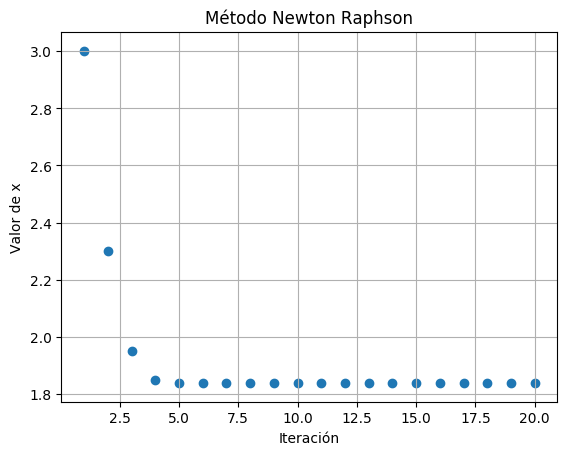

In [143]:
Grafico_Xk(3,20);

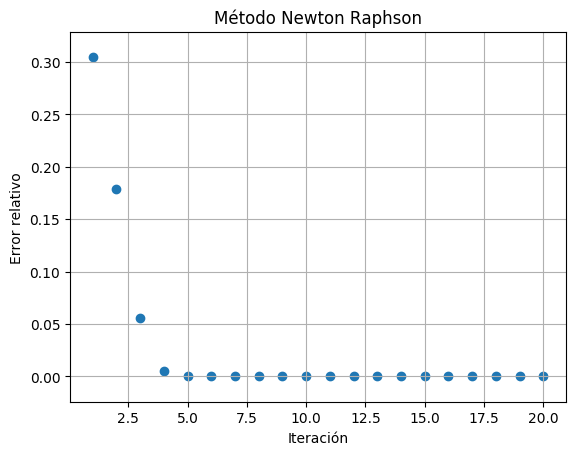

In [144]:
Grafico_ErrorX(3,20);

Ejemplo 2:
punto inicial en -5, con 60 iteraciones. 

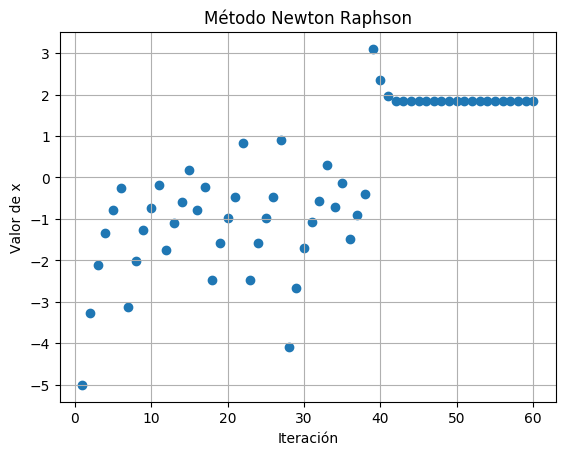

In [145]:
Grafico_Xk(-5,60);

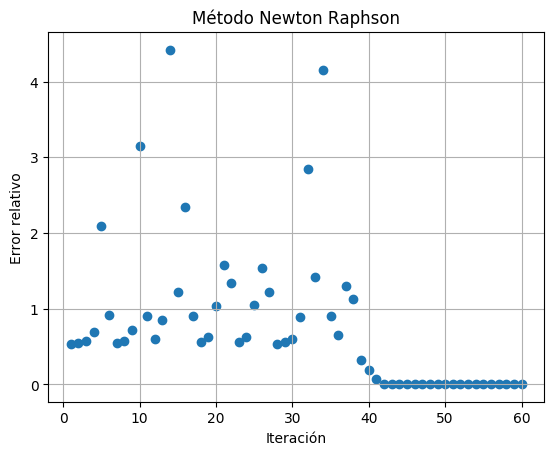

In [146]:
Grafico_ErrorX(-5,60);

Ejemplo 3:
punto inicial en 1,000,000, con 50 iteraciones. 

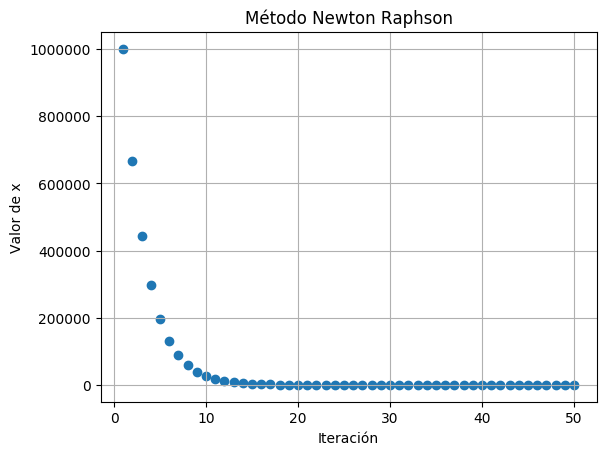

In [147]:
Grafico_Xk(1000000,50);

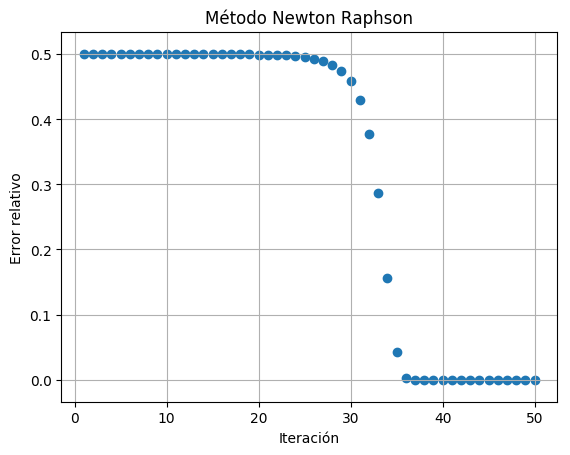

In [148]:
Grafico_ErrorX(1000000,50);

Ejemplo 4: punto inicial en -40 con, 30 iteraciones.

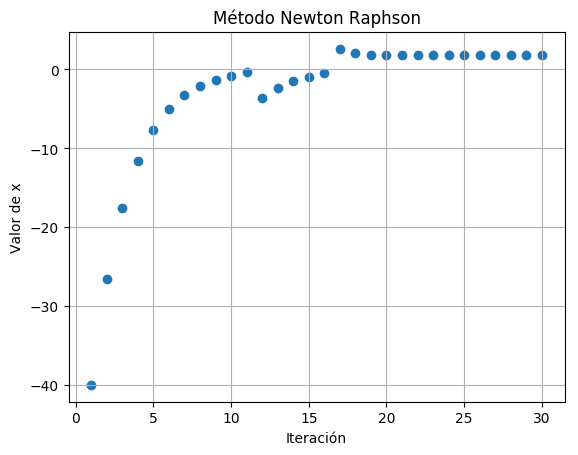

In [149]:
Grafico_Xk(-40,30);

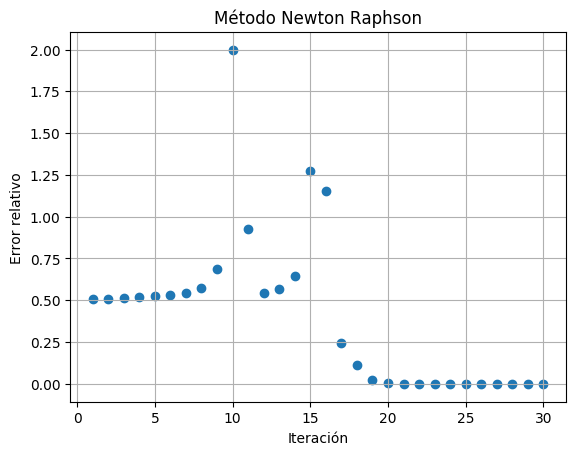

In [150]:
Grafico_ErrorX(-40,30);

#### b) Hacer lo mismo usando el método de bisección.

In [151]:
#Modificando un poco el codigo del profesor como en el caso anterior tenemos:
function biseccion(a,b,n)
    f(z)= z^3-z^2-z-1
    Aproximacionp=zeros(n)
    Errorp=zeros(n)
    p = (a+b)/2
    for i in 1:n
        #Buscamos definir el x inicial para el error
        x=p
        Aproximacionp[i]=p
        if  f(a)*f(p) > 0
            a = p
        end
        if f(b)*f(p) > 0
            b = p
        end
        #definimos el p final
        p = (a+b)/2
        Error=(p-x)/(p)
        Errorp[i]=abs(Error)
    end
    return Aproximacionp, Errorp, p
end

biseccion (generic function with 1 method)

In [152]:
using PyPlot

#n=numero de intervalos, x=punto a evaluar las raices
function Grafico_Pk(a,b,n)
    Matriz=biseccion(a,b,n)
    Aproximacion_f_x=zeros(n)
    for i=1:n
        Aproximacion_f_x[i]=Matriz[1][i]
    end
    #Graficación:
    scatter(1:n,Aproximacion_f_x)
    #Preferencias:
    xlabel("Iteración")
    ylabel("Valor de p")
    title("Método de Bisección")
    grid("on")
    #This Die
    return show()
end

function Grafico_ErrorP(a,b,n)
    Matriz=biseccion(a,b,n)
    Error_f_x=zeros(n)
    for i=1:n
        Error_f_x[i]=Matriz[2][i]
    end
    scatter(1:n,Error_f_x)
    xlabel("Iteración")
    ylabel("Error relativo")
    title("Método de bisección")
    grid("on")
    return show()
end;

Ejemplo 1: Intervalo -5 a 5 con 20 iteraciones

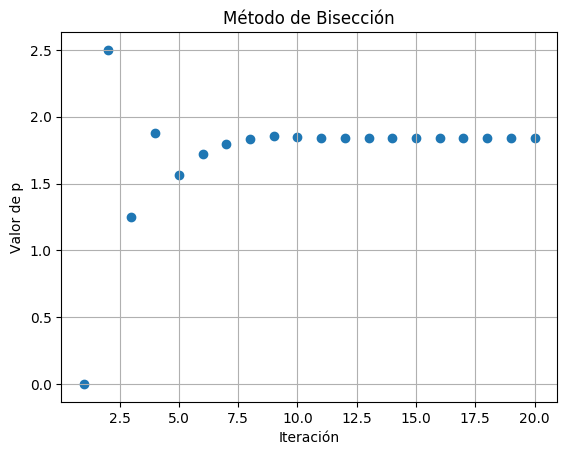

In [153]:
Grafico_Pk(-5,5,20)

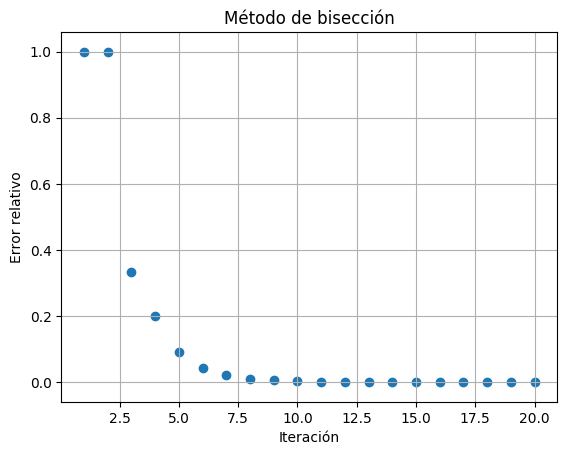

In [154]:
Grafico_ErrorP(-5,5,20)

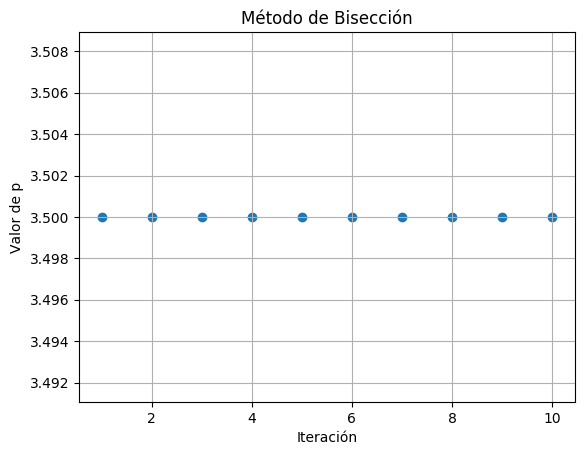

In [155]:
Grafico_Pk(2,5,10)

Ejemplo 2: Intervalo de 2 a 5, 10 iteraciones. No se encontró raíz.

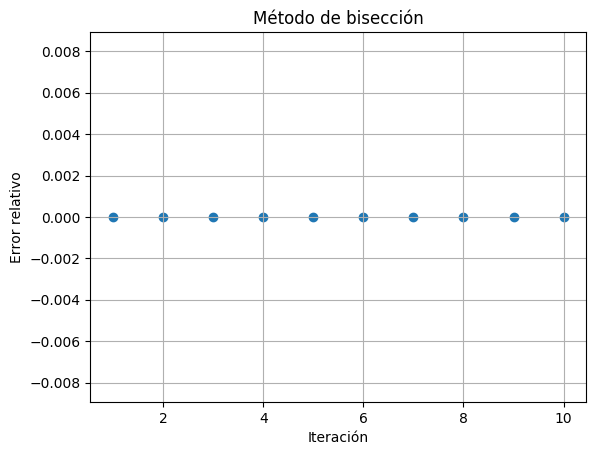

In [156]:
Grafico_ErrorP(2,5,10)

Ejemplo 3: Intervalo de -11 a 90, 10 iteraciones.

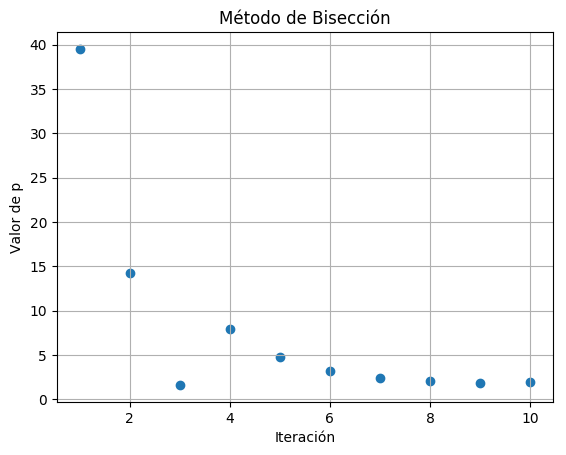

In [157]:
Grafico_Pk(-11,90,10)

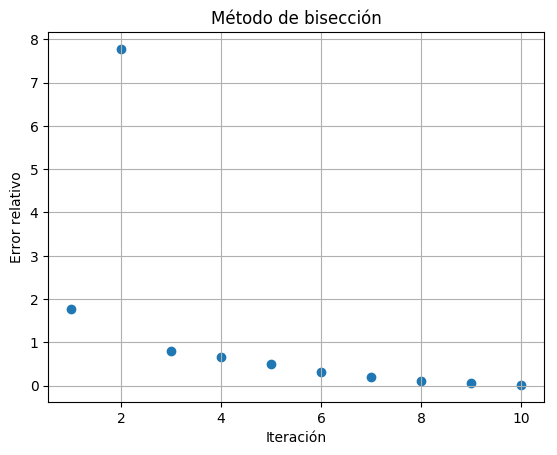

In [158]:
Grafico_ErrorP(-11,90,10)

Ejemplo 4: Intervalo de -30 a 15, 15 iteraciones.

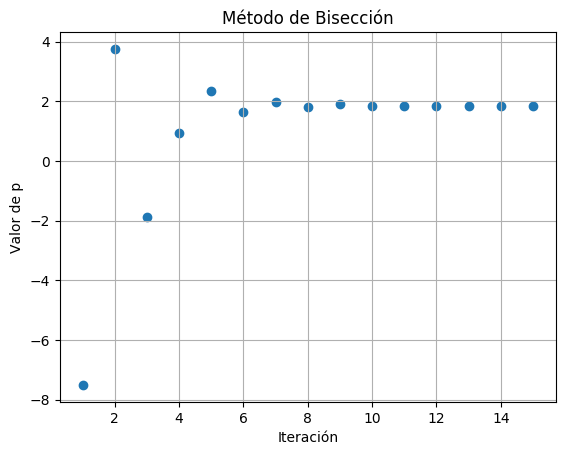

In [159]:
Grafico_Pk(-30,15,15)

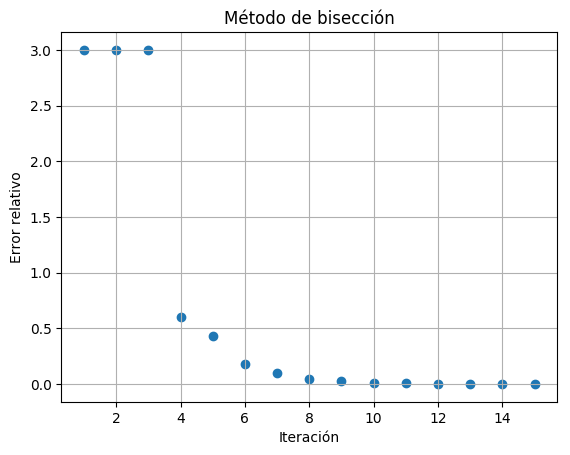

In [160]:
Grafico_ErrorP(-30,15,15)

Cuando comparamos los métodos se observa que las gráficas de errores se comportan bien distinto (ver comparación 1), en el caso de N-R vemos que si la función tiene una derivada muy variante, esta se ve manifestada en su error, sin embargo en el caso de la bisección su error siempre decrece. Además se observa la limitante de que en el método de N-R si la derivada se hace 0 en algún punto $x_0$, y si se trata de evaluar, se generan problemas en el dominio dado por la división de esta derivada (ver comparación 2). Por otro lado el de la bisección no funciona si en el intervalo dado no encuentra ningúna raíz siendo $p_{n+1}=p_n$, lo que nos sugiere intentar en otro intervalo, mientras que N-R no cuenta problemas de este estilo (ver comparación 3).

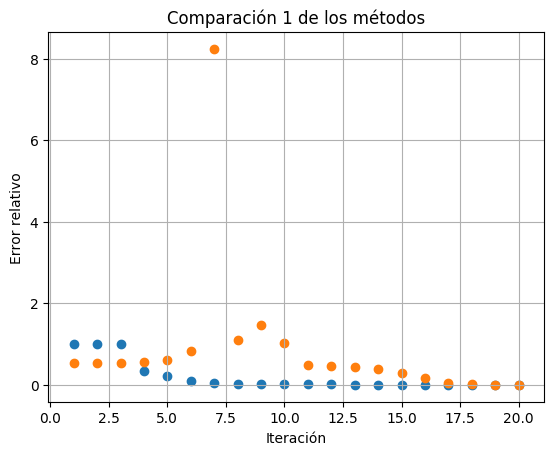

In [161]:
Grafico_ErrorP(-10,10,20)
Grafico_ErrorX(-10,20)
title("Comparación 1 de los métodos")
show()

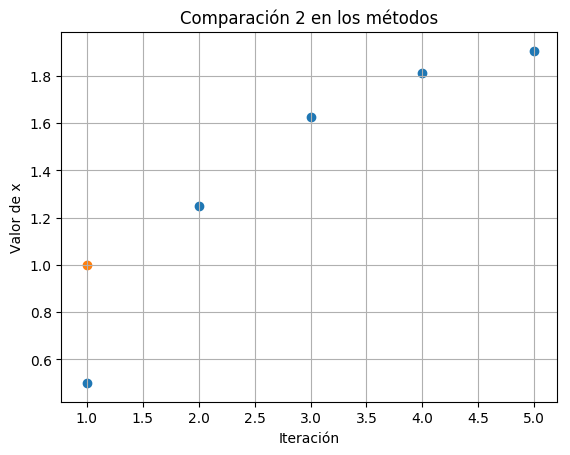

In [162]:
Grafico_Pk(-1,2,5)
Grafico_Xk(1,5)
title("Comparación 2 en los métodos")
show()

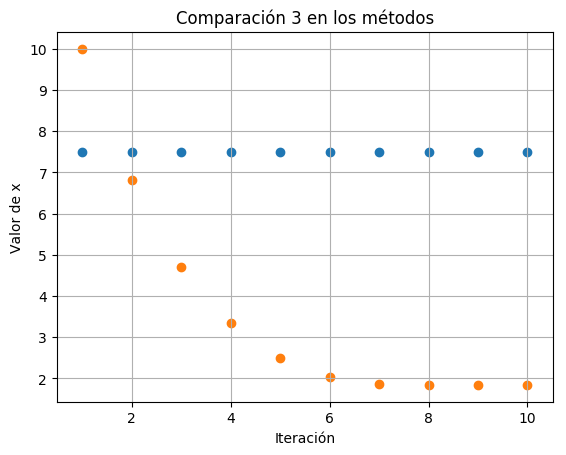

In [163]:
Grafico_Pk(5,10,10)
Grafico_Xk(10,10)
title("Comparación 3 en los métodos")
show()

--------------
### 2.- Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones:

Usaremos SymPy en todo el código:

In [164]:
Pkg.add("SymPy")
using SymPy

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


#### a) Que tome como argumentos tanto a la función, su derivada y la condición inicial. Es decir, el input debe ser metodo_newton(f,df,x0). El output debe ser alguna raíz.

In [168]:
f(x)=x^2+x-3
df(x)=2x+1

df (generic function with 1 method)

In [169]:
function metodo_newton(f,df,x0)
    for i in 1:200
        x0=x0-f(x0)/df(x0)
    end
    return x0
end

metodo_newton (generic function with 2 methods)

In [170]:
metodo_newton(f,df,5)

1.3027756377319946

---
#### b) Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un rango amplio de condiciones iniciales, por ejemplo costruido con linspace. Es muy probable que funcione llamando la funcion que crearon como metodo_newton.(f,df,x). Si no funciona la sintaxis creen una rutina solo para vectores, que seria lo previo al siguiente punto. El ouput debe ser un arreglo donde las entradas son raices, no importa que estén repetidas.

Para hacer esta actividad creé un intervalo de enteros de $a$ a $b$ de tal modo que el codigo queda:


In [171]:
function  metodo_newton2(a,b)
    x=a:b #Este es nuestro array (linspice)
    n=b-a #Este es el numero de elementos que escogí
    output=zeros(n)
    for i in 1:n
    output[i]=metodo_newton(f,df,x[i]) #llamamos a la evaluación anterior dada por un punto
    end
return output
end

metodo_newton2 (generic function with 1 method)

In [172]:
 metodo_newton2(-3,6)

9-element Array{Float64,1}:
 -2.30278
 -2.30278
 -2.30278
  1.30278
  1.30278
  1.30278
  1.30278
  1.30278
  1.30278

Puede modificarse para que el input sea un vector columna $v$, pero no se usó por ser tardado generar este input de manera cambiar, pero se puede hacer cambiando a $x$ por $v$,a $n$ por lenght($v$) y al argumento de la función de $a$,$b$ al array $v$

---

#### c) Crear la misma rutina, pero que esta vez solo reciba un rango amplio de condiciones iniciales (objetos `linspace`) y que revise el arreglo despues de $200$ iteraciones y solo tome las raices diferentes hasta cierto $\epsilon$. Aquí pueden usar `push!` para ir guardando las raíces en un vector inicializado como (por ej.) `t=[]`. El _output_ tiene que ser precisamente `t`. 

In [173]:
#a,b serán el intervalo del linspace de números enteros, e va ser el epsilon de comparación
function metodo_newton3(a,b,epsilon)
    #Llamamos al metodo anterior y definimos un vector para toda la función por tiempos de calculo
    Vector=metodo_newton2(a,b)
    #Aquí hacemos el código para descartar raices repetidas con un contador, si es máximo, procedera al push
    t=[]
    push!(t,Vector[1])
    for i in 1:length(Vector)
        contador=0
        for j in 1:length(t)
            if Vector[i]>t[j]+epsilon
                contador=contador+1
            end
            if Vector[i]<t[j]-epsilon
                contador=contador+1
            end
        end
        if contador==length(t)
            push!(t,Vector[i])
        end
    end
return t
end

metodo_newton3 (generic function with 1 method)

In [174]:
metodo_newton3(-10,10,.000000000001)

2-element Array{Any,1}:
 -2.30278
  1.30278

##### d) Resumen:  
### Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los inputs de la función del método sean solamente la función y la condición inicial.

Seleccionamos un intervalo de evaluación entera de -20 a 20, un epsilon de .000000000001 para 200 iteraciones. La función dada por el usuario se escribirá en una linea de código distinta y se usara sympy.

In [175]:
Pkg.add("SymPy")
using SymPy

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


Aquí en la casilla, el usuario registra la función que se deseé evaluar: [Es importante respetar la notación g(x) y evaluarla en la función creada más adelante]

In [176]:
g(x)=(x+2)*(x+1)*(x-4)*(x-3)*(x+5)*(x+10)

g (generic function with 1 method)

Para generar el código, se emplearon 3 casillas distintas para definir 3 funciones distintas, luego se compactó a una sola linea de código y función. Cabe señalar que dentro de una función las variables se redefinen dentro de esta y no hay problema con que se repitan sus argumentos.

In [177]:
function metodo_newthon_final(g,a,b)
    #PARA INTRODUCIR EL COMANDO: g es la función anterior y a y b son el intervalo de numeros enteros que evaluará el código#

    function raiz_punto(g,x0,n)
        x=symbols("x")
    #Volvemos a g, como un simbolo:
        f=g(x)
    #Calculamos su derivada
        df=simplify(diff(f))
    #Queremos operar con f y df como función de julia:
        dg=lambdify(df,[x])
    #Metodo de Newton-Raphson para el punto x0
        for i in 1:n
            x0=x0-g(x0)/dg(x0)
        end
    return x0
    end
    
    #función inspirada en la 2a parte, vector de resultados y evaluación
    function  raiz_intervalo(a,b,n)
        I=a:b
        m=b-a
        output=zeros(m)
        for i in 1:m
            output[i]=raiz_punto(g,I[i],n)
        end
    return output
    end
    
    #Función inspirada en la 3a parte:
    #a,b serán el intervalo del linspace de números enteros, e va ser el epsilon de comparación
    function raices(a,b,n,epsilon)
    #Se define un vector con la función de evaluación para no llamar muchas veces a la función:
        Vector=raiz_intervalo(a,b,n)
    #Aquí hacemos el código para descartar raices repetidas
        t=[]
        push!(t,Vector[1])
        for i in 1:length(Vector)
            contador=0
            for j in 1:length(t)
                if Vector[i]>t[j]+epsilon
                    contador=contador+1
                end
                if Vector[i]<t[j]-epsilon
                    contador=contador+1
                end
            end
            if contador==length(t)
                push!(t,Vector[i])
            end
        end
    return t
    end

    #Aquí se escriben las codiciones iniciales pedidas en el problema:
    n=200
    epsilon=.000000000001
    FINAL=raices(a,b,n,epsilon)
    return FINAL
end 

metodo_newthon_final (generic function with 1 method)

Es así que para evaluar $g(x)$ en nuestro intervalo $[a,b]$, queda de la siguiente manera:

In [179]:
metodo_newthon_final(g,-20,20)

6-element Array{Any,1}:
 -10.0
  -5.0
  -2.0
  -1.0
   3.0
   4.0

Completando la tarea.
*****
```python
F F M G
```

